In [1]:
import numpy as np
import pandas as pd
import warnings
%matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import glob
# import json
# import tldextract   # Accurately separates a URL's subdomain, domain, and public suffix
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
import re
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import nltk 
# import copy
# from nltk.stem import PorterStemmer
# from nltk.corpus import stopwords,wordnet
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer,LancasterStemmer
from sklearn.metrics import f1_score
from pprint import pprint
import warnings
import pickle
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 1000)

In [5]:
#creating a data frame
df = pd.read_csv("Updated//full_dataset_fakenewsnet_cleaned_using_nltk.csv")
df = df[df['cleantext'].notna()]
df=df.iloc[0:3000]
df.shape

(3000, 10)

In [6]:
#df.head(1)

In [3]:
# filename = 'outputs//isot_ml_tfidf//isot_ml_RF_tfidf.sav'

# rf_clf_tuned = pickle.load(open(filename, 'rb'))

In [8]:
# X=isot_full_df['cleaned_fulltext']
# y=isot_full_df['class']

X_train, X_test = train_test_split(df, test_size=0.2,stratify=df['class'], random_state=0)


In [9]:
X_train_sampled=X_train.iloc[0:1000]
X_test_sampled=X_test.iloc[0:500]
X_train_sampled=X_train.copy()
#X_test_sampled=X_test.copy()

In [10]:
train_X=X_train_sampled['cleantext']
train_y=X_train_sampled['class']
test_X=X_test_sampled['cleantext']
test_y=X_test_sampled['class']

In [11]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(train_X).toarray()
X_test_tfidf = tfidf.transform(test_X).toarray()

In [12]:
X_test_tfidf.shape

(500, 1000)

In [13]:
from tqdm import tqdm

In [14]:
rf_clf=RandomForestClassifier(random_state=0,n_estimators=800,max_features='auto',max_depth=150,min_samples_split=10,min_samples_leaf=1,bootstrap=False)
rf_clf.fit(X_train_tfidf,train_y)

pred = rf_clf.predict(X_test_tfidf)
print("Accuracy score : {}".format(accuracy_score(test_y, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(test_y, pred)))
print("Classification Report")
print(classification_report(test_y, pred))
precision = precision_score(test_y, pred)
print("Precision : {}".format(precision))
recall = recall_score(test_y, pred)
print("Recall : {}".format(recall))
f1score = f1_score(test_y, pred)
print("F1 Score : {}".format(f1score))

Accuracy score : 0.91
Confusion matrix : 
 [[432   4]
 [ 41  23]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       436
           1       0.85      0.36      0.51        64

    accuracy                           0.91       500
   macro avg       0.88      0.68      0.73       500
weighted avg       0.91      0.91      0.89       500

Precision : 0.8518518518518519
Recall : 0.359375
F1 Score : 0.5054945054945055


In [15]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [16]:
feature_names = tfidf.get_feature_names_out()

In [17]:
len(feature_names)

1000

In [14]:
# explainerModel = shap.TreeExplainer(rf_clf)
# shap_values_Model = explainerModel.shap_values(S)

In [15]:
# explainerModel = shap.TreeExplainer(rf_clf)

In [16]:
# a=X_test.iloc[[0]]

In [17]:
# X_test_tfidf = tfidf.transform(test_X)

In [18]:
# # Calculate Shap values
# choosen_instance = X_test.iloc[[0]]
# shap_values = explainerModel.shap_values(choosen_instance)
# #shap.force_plot(explainerModel.expected_value[1], shap_values[1], choosen_instance)

In [18]:
X_test_tfidf.shape

(500, 1000)

In [19]:
feature_names = tfidf.get_feature_names_out()
explainer = shap.Explainer(rf_clf, X_train_tfidf, feature_names=feature_names)

In [20]:
shap_values = explainer(X_test_tfidf)
print(shap_values.values.shape) # (5000, 16438, 2)

 99%|===================| 994/1000 [01:15<00:00]        

(500, 1000, 2)


In [21]:
import copy

In [22]:
X_test_tfidf.shape

(500, 1000)

In [23]:
#X_test_sample2=X_test_sample.copy()
X_test_sample_v2 = X_test_sampled.copy(deep=True)

In [24]:
X_test_sample_v2=X_test_sample_v2.reset_index()

In [34]:
X_test_sample_v2.head(2)

,index,url,text,title,authors,num_images,domain,Category,class,fulltext,cleantext
0,767,https://notallowedto.com/babysitter-on-drug-eats-toddler/,"9.6k SHARES Share Tweet Share\n\nDe Soto, Missouri – Parents of a three-month old baby were horrified to discover their babysitter had turned into a crystal meth-smoking cannibal when they found the remains of their child cooked in the microwave.\n\nAccording to police report, the young parents, were out at the movies before they came back home to find a confused babysitter under the influence of alcohol and crystal meth who had lost consciousness and was covered in blood in the family’s living room.\n\nMoments later, the parents made the gruesome discovery when the young mother saw something moving in microwave.\n\nThe 16-year-old babysitter named ‘Anna Ritchie’, claims she had brought some crystal meth and only took a few hits before she became hungry and eventually lost consciousness.\n\n“I just took a few hits because I was bored and wanted to stay awake,” she told Officer Robert. “All I remember is that I started getting really hungry, ate some chicken wings and passed out” re...",Babysitter on Crystal Meth Eats 3-Month-Old Baby,[],7,notallowedto,Politics,1,"Babysitter on Crystal Meth Eats 3-Month-Old Baby.9.6k SHARES Share Tweet Share\n\nDe Soto, Missouri – Parents of a three-month old baby were horrified to discover their babysitter had turned into a crystal meth-smoking cannibal when they found the remains of their child cooked in the microwave.\n\nAccording to police report, the young parents, were out at the movies before they came back home to find a confused babysitter under the influence of alcohol and crystal meth who had lost consciousness and was covered in blood in the family’s living room.\n\nMoments later, the parents made the gruesome discovery when the young mother saw something moving in microwave.\n\nThe 16-year-old babysitter named ‘Anna Ritchie’, claims she had brought some crystal meth and only took a few hits before she became hungry and eventually lost consciousness.\n\n“I just took a few hits because I was bored and wanted to stay awake,” she told Officer Robert. “All I remember is that I started getting really ...",babysitter crystal meth eats month old baby share share tweet share soto missouri parent month old baby horrified discover babysitter turned crystal meth smoking cannibal remains child cooked microwave according police report young parent movie came home confused babysitter influence alcohol crystal meth lost consciousness covered blood family living room moment later parent gruesome discovery young mother saw moving microwave year old babysitter named anna ritchie claim brought crystal meth took hit hungry eventually lost consciousness took hit bored wanted stay awake told officer robert remember started getting hungry ate chicken wing passed recall police officer visibly traumatized latest event month old child microwave covered barbecue sauce rushed springfield mercy hospital doctor fear life apparently baby sitter tried cook baby microwave oven unable probably disoriented lost consciousness moment later explained sheriff deputy anderson james jefferson county police department ...
1,698,https://web.archive.org/web/20161213021214/http://usasnich.com:80/breaking-putin-interference-could-give-courts-legal-right-to-make-hillary-president/,"BREAKING!\n\nLiberal rag Huffington Post is really running with this story from The Washington Post about the CIA “confirming” Russian interference in the presidential election.\n\nThey’re saying if 100% true, the courts can PUT HILLARY IN THE WHITE HOUSE!\n\nScary!\n\nFrom HuffPo:\n\nA 1995 federal court ruling out of Pennsylvania may offer some clues to Clinton supporters as to possible legal authority for removing an elected official from office and replacing them with their erstwhile opponent.\n\nIn light of late-breaking reports Friday evening that Russians interfered with the 2016 presidential electio

In [35]:
X_test[X_test['class']==0].index

Int64Index([2114,  100,  221,   94, 1763, 2420, 2196, 1045, 2509,  365,
            ...
            1420, 2737, 1846,  246, 1160, 2526, 2298, 2251, 2347, 1478], dtype='int64', length=525)

In [36]:
X_test[X_test['class']==1].index

Int64Index([767, 698, 500, 710, 751, 632, 814, 650, 793, 606, 483, 788, 724, 613, 619, 664, 719, 505, 739, 561, 675, 766, 527, 755, 507, 679, 762, 520, 740, 661, 820, 502, 707, 785, 779, 623, 704, 543, 818, 680, 469, 628, 549, 534, 699, 640, 571, 815, 809, 565, 584, 686, 787, 765, 761, 592, 616, 732, 801, 790, 530, 693, 694, 700, 630, 602, 494, 716, 775, 556, 593, 497, 489, 516, 721], dtype='int64')

In [28]:
#X_test[X_test['class']==0].head(100)

In [37]:
X_test_sample_v2.shape

(500, 11)

In [38]:
len(X_test_tfidf)

500

In [40]:
X_test_sample_v2[['index','fulltext']][X_test_sample_v2['index']==2114]

,index,fulltext
2,2114,"J.J. Watt's Hurricane Harvey relief fund closes with over $37 million raised.J.J. Watt's Hurricane Harvey relief fund closes with over $37 million raised\n\nShow Caption Hide Caption How sports brings communities together in times of tragedy SportsPulse: USA TODAY Sports' Trysta Krick discusses the impact sports have on us all during times of need. USA TODAY Sports\n\nJ.J. Watt's fund for Hurricane Harvey victims in Houston raised more than $37 million before it was closed Friday at the request of the NFL star, according to YouCaring, the company that handled the online donations.\n\n""If there is one thing that I have taken away from these last few weeks, it is the reassurance of how much good is out there in our world,'' wrote Watt, an All-Pro defensive end for the Houston Texans, in a message on his fund's page at YouCaring.com. ""When times are the toughest, humanity stands at its strongest and you have all helped to prove that emphatically.''\n\nWhen the fund closed at 6 p.m. ET..."


watt hurricane harvey relief fund close million raised watt hurricane harvey relief fund close million raised caption hide caption sport brings community time tragedy sportspulse usa today sport trysta krick discus impact sport time need usa today sport watt fund hurricane harvey victim houston raised million closed friday request nfl star according youcaring company handled online donation thing taken away week reassurance good world wrote watt pro defensive end houston texan message fund page youcaring time toughest humanity stand strongest helped prove emphatically fund closed friday watt wrote effort shift fundraising ensuring money work people devastated area houston watt get work lifting spirit delivering good houston watt spend million plus raised hurricane victim watt started online campaign aug donation goal raising people donated apiece place donated hard earned money honored chosen join effort support people affected hurricane harvey wrote spirit helping alive world better p

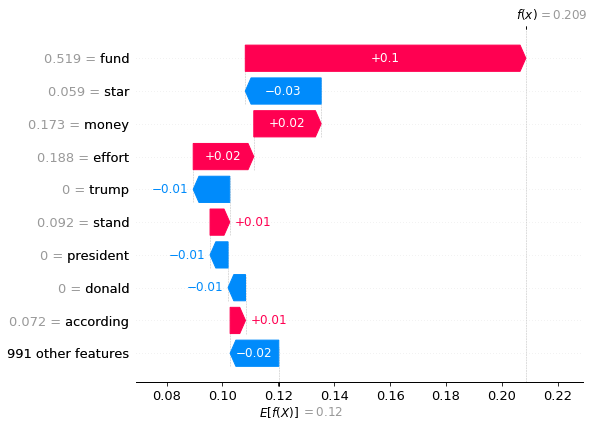

In [41]:
ind=2
print(X_test_sample_v2['cleantext'].iloc[ind])
shap.plots.waterfall(shap_values[ind,:,1])

In [42]:
shap.plots.force(shap_values[ind,:,1])

In [43]:
len(pred)

500

In [44]:
#combining predictions with truth class labels in test_filtered dataframe
X_test_sample_v2.insert(len(X_test_sample_v2.columns),'pred',pred)
X_test_sample_v2.head(2)

,index,url,text,title,authors,num_images,domain,Category,class,fulltext,cleantext,pred
0,767,https://notallowedto.com/babysitter-on-drug-eats-toddler/,"9.6k SHARES Share Tweet Share\n\nDe Soto, Missouri – Parents of a three-month old baby were horrified to discover their babysitter had turned into a crystal meth-smoking cannibal when they found the remains of their child cooked in the microwave.\n\nAccording to police report, the young parents, were out at the movies before they came back home to find a confused babysitter under the influence of alcohol and crystal meth who had lost consciousness and was covered in blood in the family’s living room.\n\nMoments later, the parents made the gruesome discovery when the young mother saw something moving in microwave.\n\nThe 16-year-old babysitter named ‘Anna Ritchie’, claims she had brought some crystal meth and only took a few hits before she became hungry and eventually lost consciousness.\n\n“I just took a few hits because I was bored and wanted to stay awake,” she told Officer Robert. “All I remember is that I started getting really hungry, ate some chicken wings and passed out” re...",Babysitter on Crystal Meth Eats 3-Month-Old Baby,[],7,notallowedto,Politics,1,"Babysitter on Crystal Meth Eats 3-Month-Old Baby.9.6k SHARES Share Tweet Share\n\nDe Soto, Missouri – Parents of a three-month old baby were horrified to discover their babysitter had turned into a crystal meth-smoking cannibal when they found the remains of their child cooked in the microwave.\n\nAccording to police report, the young parents, were out at the movies before they came back home to find a confused babysitter under the influence of alcohol and crystal meth who had lost consciousness and was covered in blood in the family’s living room.\n\nMoments later, the parents made the gruesome discovery when the young mother saw something moving in microwave.\n\nThe 16-year-old babysitter named ‘Anna Ritchie’, claims she had brought some crystal meth and only took a few hits before she became hungry and eventually lost consciousness.\n\n“I just took a few hits because I was bored and wanted to stay awake,” she told Officer Robert. “All I remember is that I started getting really ...",babysitter crystal meth eats month old baby share share tweet share soto missouri parent month old baby horrified discover babysitter turned crystal meth smoking cannibal remains child cooked microwave according police report young parent movie came home confused babysitter influence alcohol crystal meth lost consciousness covered blood family living room moment later parent gruesome discovery young mother saw moving microwave year old babysitter named anna ritchie claim brought crystal meth took hit hungry eventually lost consciousness took hit bored wanted stay awake told officer robert remember started getting hungry ate chicken wing passed recall police officer visibly traumatized latest event month old child microwave covered barbecue sauce rushed springfield mercy hospital doctor fear life apparently baby sitter tried cook baby microwave oven unable probably disoriented lost consciousness moment later explained sheriff deputy anderson james jefferson county police department ...,0
1,698,https://web.archive.org/web/20161213021214/http://usasnich.com:80/breaking-putin-interference-could-give-courts-legal-right-to-make-hillary-president/,"BREAKING!\n\nLiberal rag Huffington Post is really running with this story from The Washington Post about the CIA “confirming” Russian interference in the presidential election.\n\nThey’re saying if 100% true, the courts can PUT HILLARY IN THE WHITE HOUSE!\n\nScary!\n\nFrom HuffPo:\n\nA 1995 federal court ruling out of Pennsylvania may offer some clues to Clinton supporters as to possible legal authority for removing an elected official from office and replacing them with their erstwhile opponent.\n\nIn light of late-breaking reports Friday evening that Russians interfered with the 2016 presidential 

In [52]:
#misclassified samples
misclassified_df = X_test_sample_v2.loc[X_test_sample_v2[X_test_sample_v2['class']!=X_test_sample_v2['pred']].index, :]  # works
misclassified_df.shape

(45, 12)

In [53]:
misclassified_df=misclassified_df[['index','fulltext','cleantext','class','pred']]

In [54]:
misclassified_df.head(50)

,index,fulltext,cleantext,class,pred
0,767,"Babysitter on Crystal Meth Eats 3-Month-Old Baby.9.6k SHARES Share Tweet Share\n\nDe Soto, Missouri – Parents of a three-month old baby were horrified to discover their babysitter had turned into a crystal meth-smoking cannibal when they found the remains of their child cooked in the microwave.\n\nAccording to police report, the young parents, were out at the movies before they came back home to find a confused babysitter under the influence of alcohol and crystal meth who had lost consciousness and was covered in blood in the family’s living room.\n\nMoments later, the parents made the gruesome discovery when the young mother saw something moving in microwave.\n\nThe 16-year-old babysitter named ‘Anna Ritchie’, claims she had brought some crystal meth and only took a few hits before she became hungry and eventually lost consciousness.\n\n“I just took a few hits because I was bored and wanted to stay awake,” she told Officer Robert. “All I remember is that I started getting really ...",babysitter crystal meth eats month old baby share share tweet share soto missouri parent month old baby horrified discover babysitter turned crystal meth smoking cannibal remains child cooked microwave according police report young parent movie came home confused babysitter influence alcohol crystal meth lost consciousness covered blood family living room moment later parent gruesome discovery young mother saw moving microwave year old babysitter named anna ritchie claim brought crystal meth took hit hungry eventually lost consciousness took hit bored wanted stay awake told officer robert remember started getting hungry ate chicken wing passed recall police officer visibly traumatized latest event month old child microwave covered barbecue sauce rushed springfield mercy hospital doctor fear life apparently baby sitter tried cook baby microwave oven unable probably disoriented lost consciousness moment later explained sheriff deputy anderson james jefferson county police department ...,1,0
10,500,"How Donald Trump Lost the 'War on Christmas'.U.S. President Donald Trump has long positioned himself as a front-line soldier in the so-called War on Christmas, which made non-Christians justifiably nervous as they anticipated his administration’s first holiday season as a religiously charged, exclusionary and divisive affair.\n\nTo really understand Trump and the Middle East - subscribe to Haaretz\n\nIndeed, days before the holiday, a pro-Trump video featuring a little blonde girl lisping “Thank you, President Trump, for letting us say ‘Merry Christmas’ again,” as if the words had somehow been previously banned or outlawed.\n\n>>Netanyahu enlists in Trump's army: ""Israel is a country that says 'Merry Christmas'""\n\nAnd then on Christmas Eve, Trump tweeted that he was ""proud"" to have beaten back what he called an ""assault"" on the holiday.\n\nThe “War on Christmas” catchphrase was coined by former Fox News host Bill O’Reilly, who claimed in 2004 that Christmas was “under siege” by “s...",donald trump lost war christmas president donald trump long positioned line soldier called war christmas non christian justifiably nervous anticipated administration holiday season religiously charged exclusionary divisive affair understand trump middle east subscribe haaretz day holiday pro trump video featuring little blonde girl lisping thank president trump letting merry christmas word previously banned outlawed netanyahu enlists trump army israel country say merry christmas christmas eve trump tweeted proud beaten called assault holiday war christmas catchphrase coined fox news host reilly claimed christmas siege secular progressive triggered department store macy decided greet customer merry christmas wish happy holiday instead reilly seized example organized effort eliminate christian religious symbol american public life right wing commentator following footstep tradition dating far right john birch society claimed

In [55]:
misclassified_df[['fulltext','class','pred']][misclassified_df['index']==2757]

,fulltext,class,pred
77,"Donald Trump's 'Covfefe' Typo Is Now Officially A Word -- And The Definition Will Have You In Stitches.Someone defined ""covfefe"" in the urban dictionary and it's so funny!\n\nYesterday at 12.06am U.S. president, Donald Trump, tweeted something about a negative press ""covfefe"" and while most probably knew it was a typo, it did not stop people from making it a trend. What he actually meant to typw was ""coverage"" but by this morning the word was trending on Twitter in South Africa and has basically been trending all day, even on Google.\n\nOn the search engine, the top search was ""covfefe meaning"" followed by ""what is a covfefe?"" Luckily, the internet is always ready with the answers. The new urban dictionary definition reads: ""(n.) When you want to say ""coverage"" but your hands are too small to hit all the letters on your keyboard.""\n\nThe Merriam-Webster dictionary also trolled Trump this morning with this tweet. Looks like they missed the whole thing.\n\nWakes up.\n\nChecks Twitter...",0,1


In [49]:
test_X.loc[2757]  # For verification of correctindex for shap with original frame

'donald trump covfefe typo officially word definition stitch defined covfefe urban dictionary funny yesterday president donald trump tweeted negative press covfefe probably knew typo stop people making trend actually meant typw coverage morning word trending twitter south africa basically trending day google search engine search covfefe meaning followed covfefe luckily internet ready answer new urban dictionary definition read want coverage hand small hit letter keyboard merriam webster dictionary trolled trump morning tweet look missed thing wake check twitter lookup regret checking twitter go bed folk maybe covfefe follow suit word bootylicious ended oxford english dictionary'

In [51]:
misclassified_df.shape

(27, 4)

donald trump covfefe typo officially word definition stitch defined covfefe urban dictionary funny yesterday president donald trump tweeted negative press covfefe probably knew typo stop people making trend actually meant typw coverage morning word trending twitter south africa basically trending day google search engine search covfefe meaning followed covfefe luckily internet ready answer new urban dictionary definition read want coverage hand small hit letter keyboard merriam webster dictionary trolled trump morning tweet look missed thing wake check twitter lookup regret checking twitter go bed folk maybe covfefe follow suit word bootylicious ended oxford english dictionary


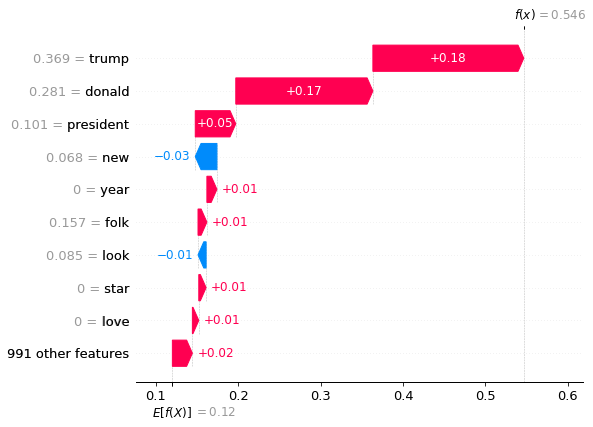

In [56]:
ind=77
print(misclassified_df['cleantext'].loc[ind])
shap.plots.waterfall(shap_values[ind,:,1])

In [57]:
shap.plots.force(shap_values[ind,:,1])